In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("E:\Data Science\Assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

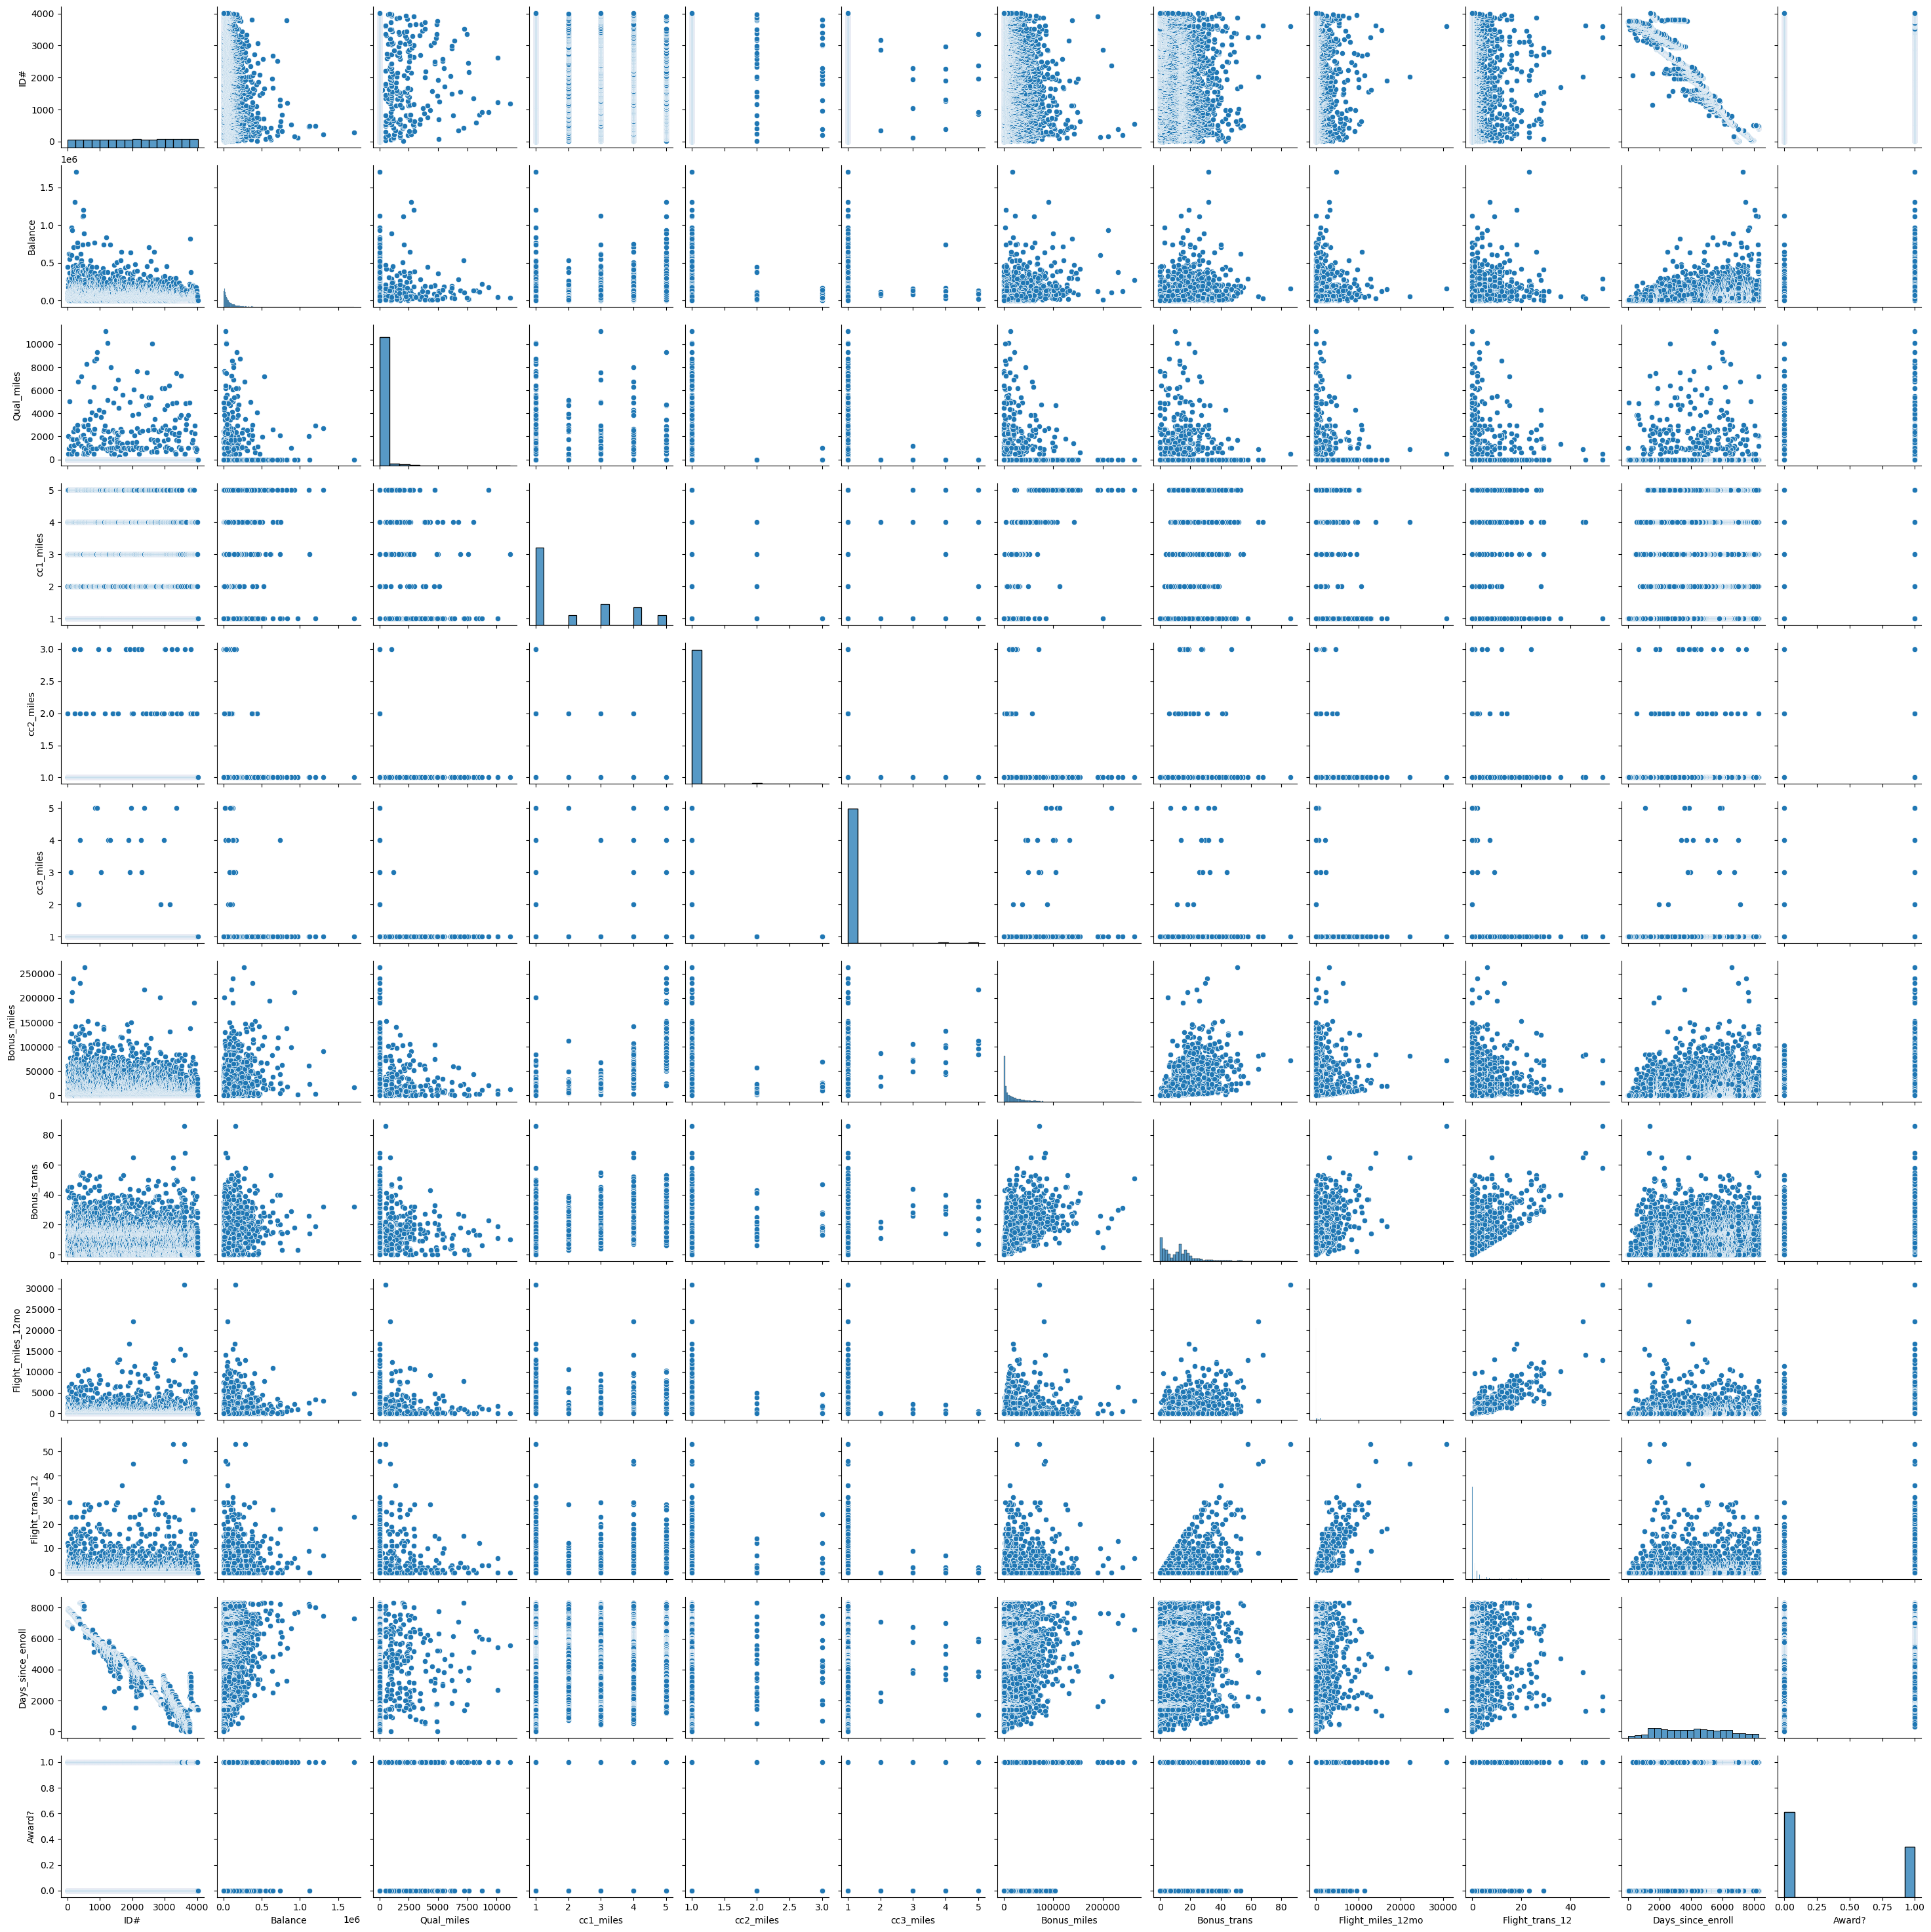

In [6]:
sns.pairplot(df)

In [7]:
columns = ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']

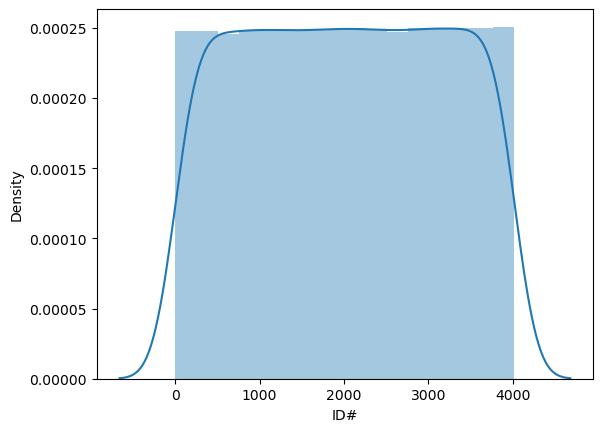

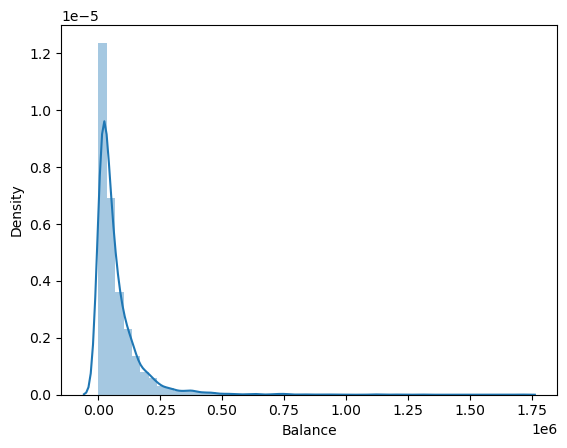

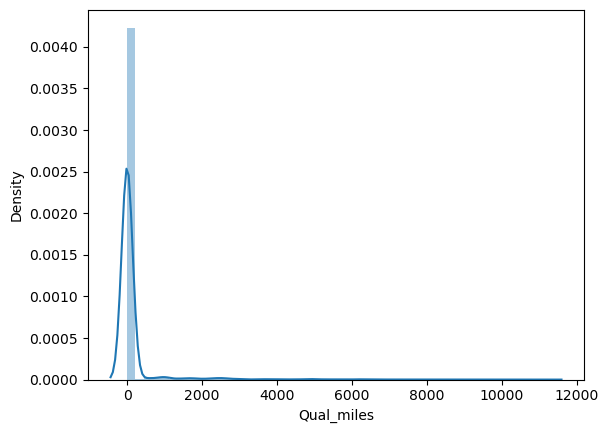

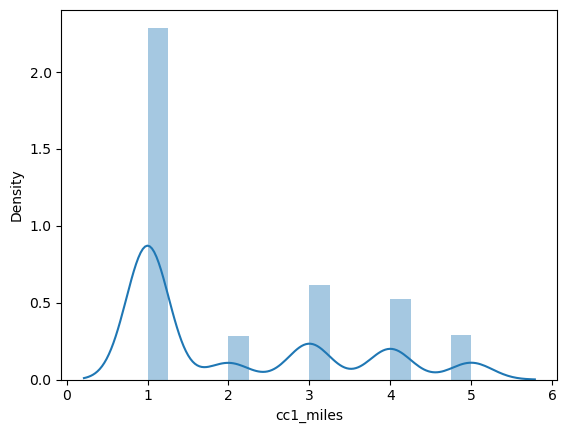

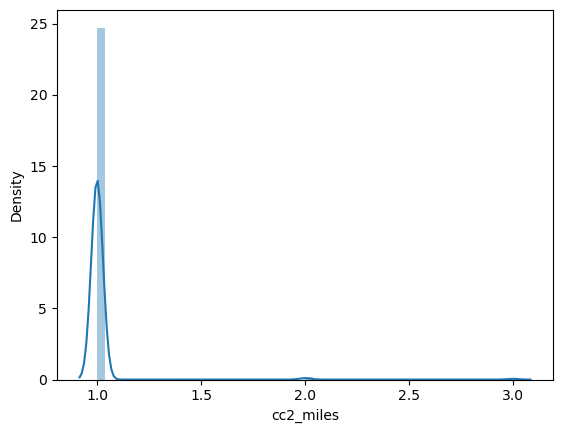

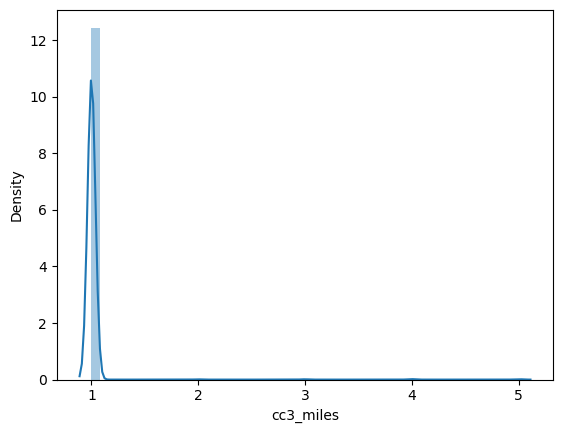

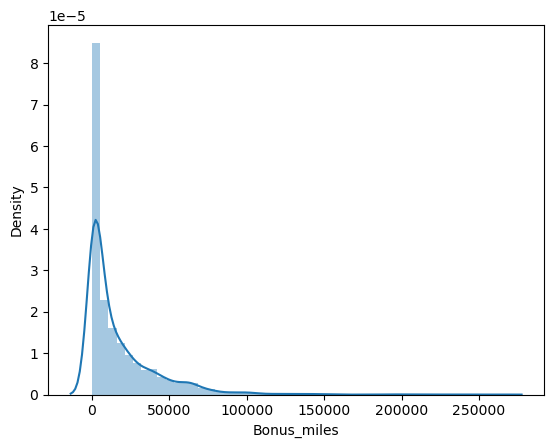

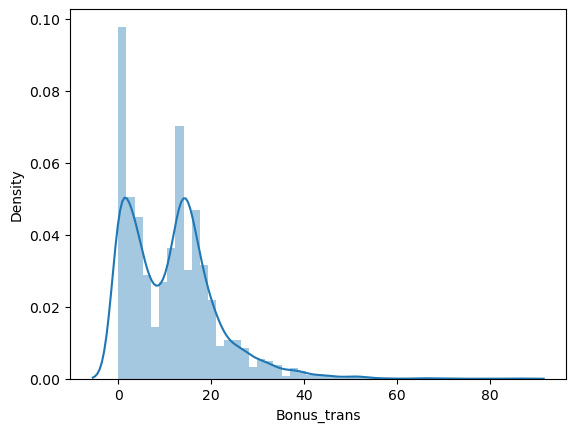

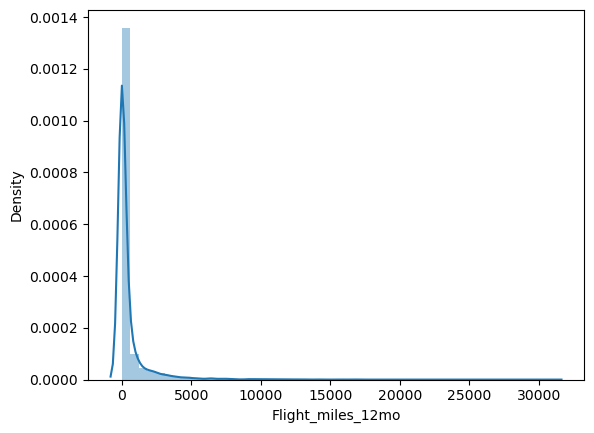

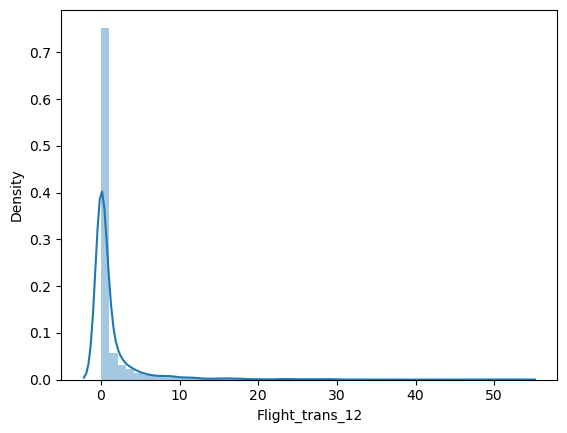

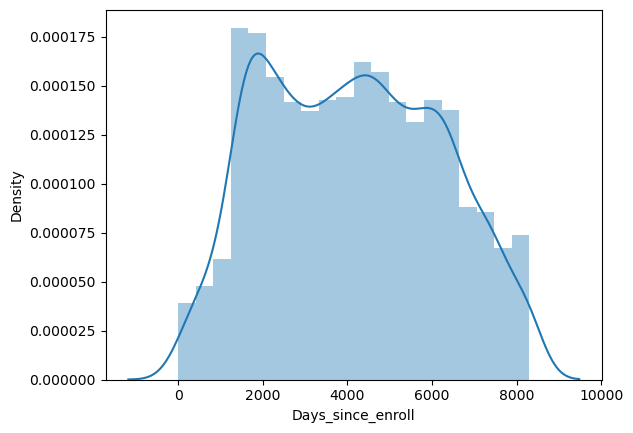

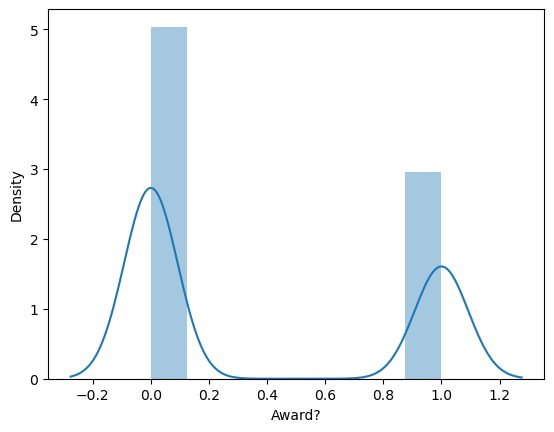

In [8]:
for i in columns:
    plt.figure()
    sns.distplot(df[i])

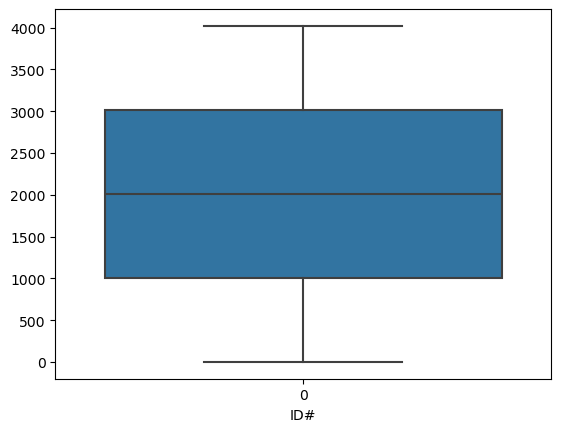

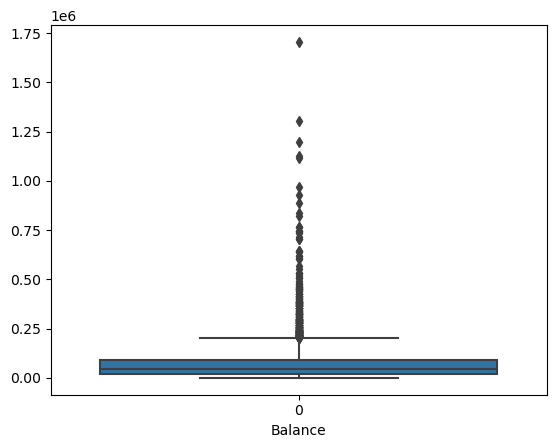

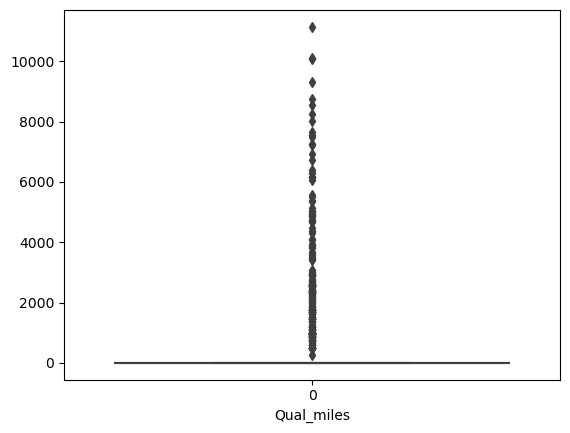

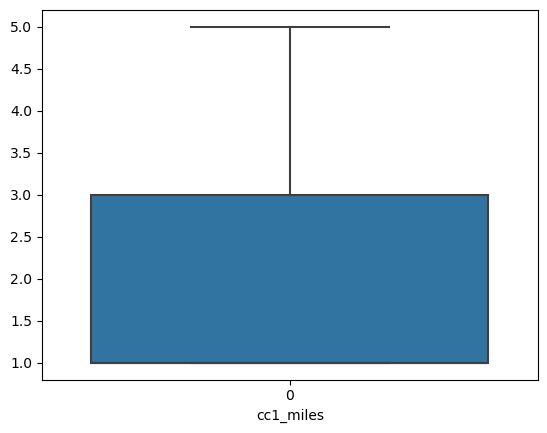

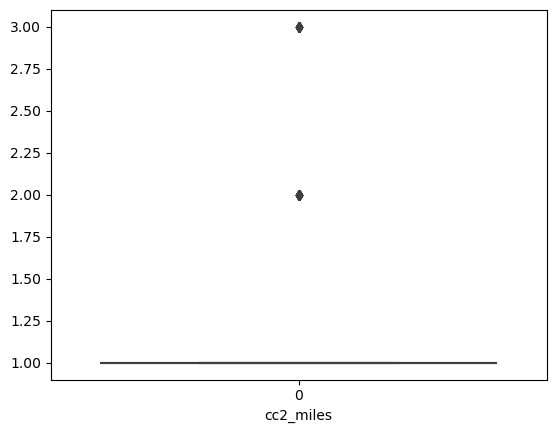

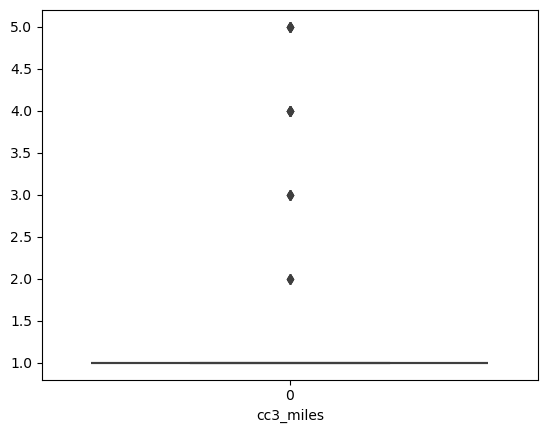

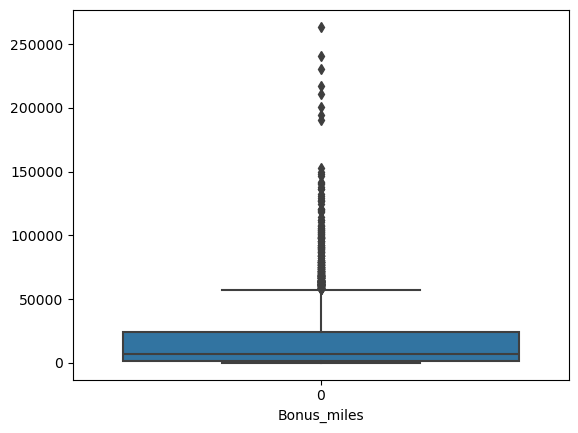

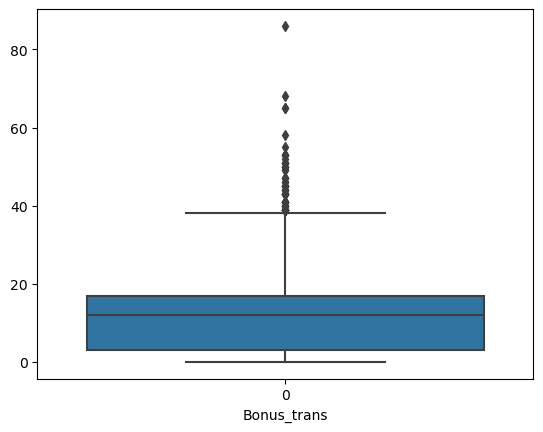

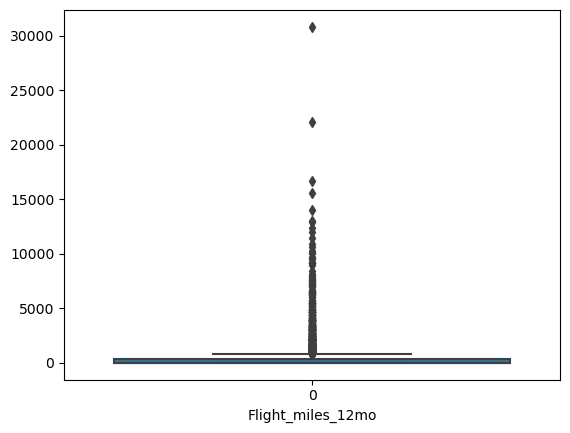

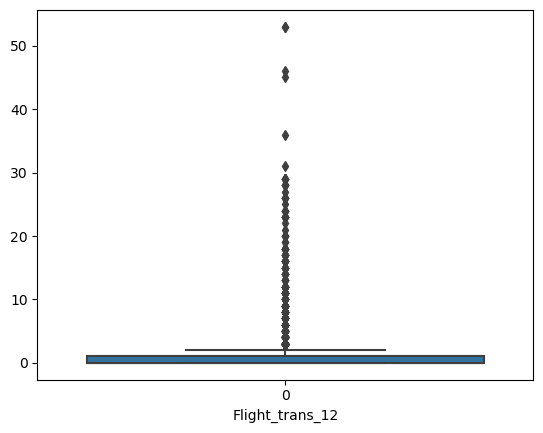

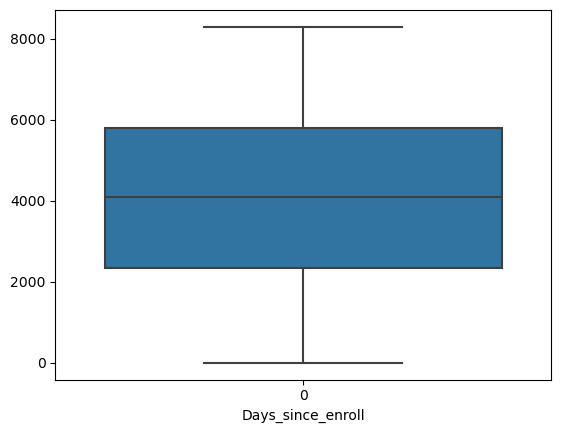

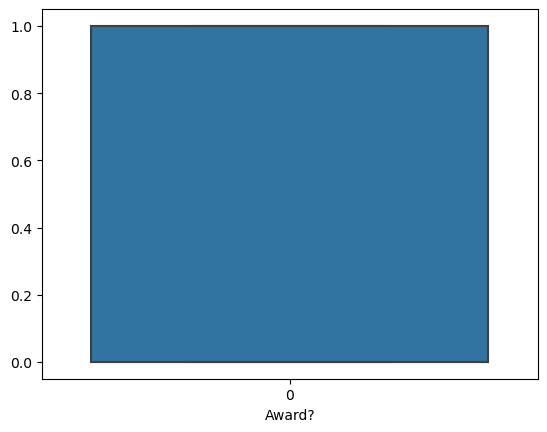

In [9]:




for i in columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.xlabel(i)

In [10]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
df.iloc[:,1:12] = ss.fit_transform(df.iloc[:,1:12])
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,4018,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,4019,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,4020,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


### K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[5386844822.646412, 1347759689.0294244, 598102988.131678, 337327434.33236665, 215484810.4386832, 149520369.41482177, 109944363.1776972, 84380092.47442804, 66585937.83829195, 53976471.67515777]


In [15]:
scores = []
for i in range(2,11):
    cluster = KMeans(n_clusters=i,init='k-means++',random_state=42)
    cluster.fit_predict(df.iloc[:,1:12])
    scores.append(silhouette_score(df.iloc[:,1:12],labels=cluster.labels_))
scores

NameError: name 'silhouette_score' is not defined

Text(0.5, 1.0, 'ELBOW CURVE')

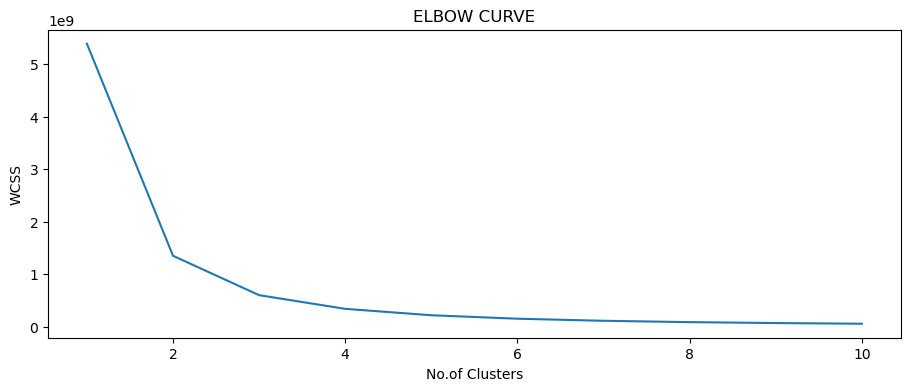

In [ ]:
plt.figure(figsize=(11,4))
plt.plot(range(1,11),WCSS)
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW CURVE")

Observation : According to the Silhoutte score and Elboow curve, I am going to take 5 clusters.

In [ ]:
kcluster = KMeans(n_clusters=5,init='k-means++',random_state=42)
kcluster.fit(df.iloc[:,1:12])

KMeans(n_clusters=5, random_state=42)

In [ ]:
kcluster.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df.iloc[:,1:12],labels=kcluster.labels_)
score

0.32490482900380546

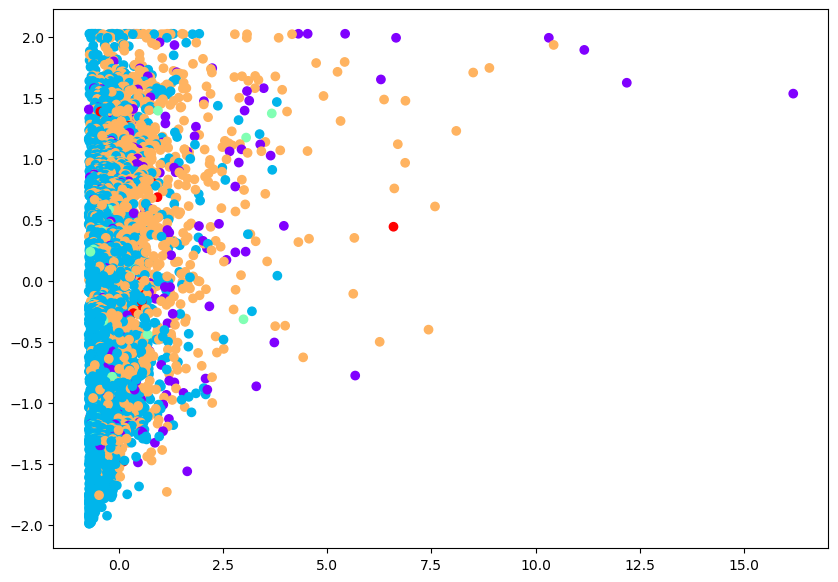

In [ ]:

plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,10], c=kcluster.labels_ ,cmap='rainbow')

##### Observation:
- By using Elbow curve, the data is formed into 5 clusters.
- The silhoutte score is also good for 5 clusters.

#### Hierarchical Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
scores1 = []
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='complete',metric='euclidean')
    cluster.fit_predict(df.iloc[:,1:12])
    scores1.append(silhouette_score(df.iloc[:,1:12],labels=cluster.labels_))
scores1


[0.8111134025692677,
 0.7760836053602842,
 0.5985727763092806,
 0.5625737661941762,
 0.5404241979396106,
 0.5418820074020084,
 0.5354664617626079,
 0.5313341704697034,
 0.41505057280945407]

Observation : For 5 clusters, the silhoutte score is maximum. Hence, clusters will be taken as 2.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='complete',metric='euclidean')
cluster.fit_predict(df.iloc[:,1:12])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
cluster.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
silhouette_score(df.iloc[:,1:12],labels=cluster.labels_)

0.41505057280945407

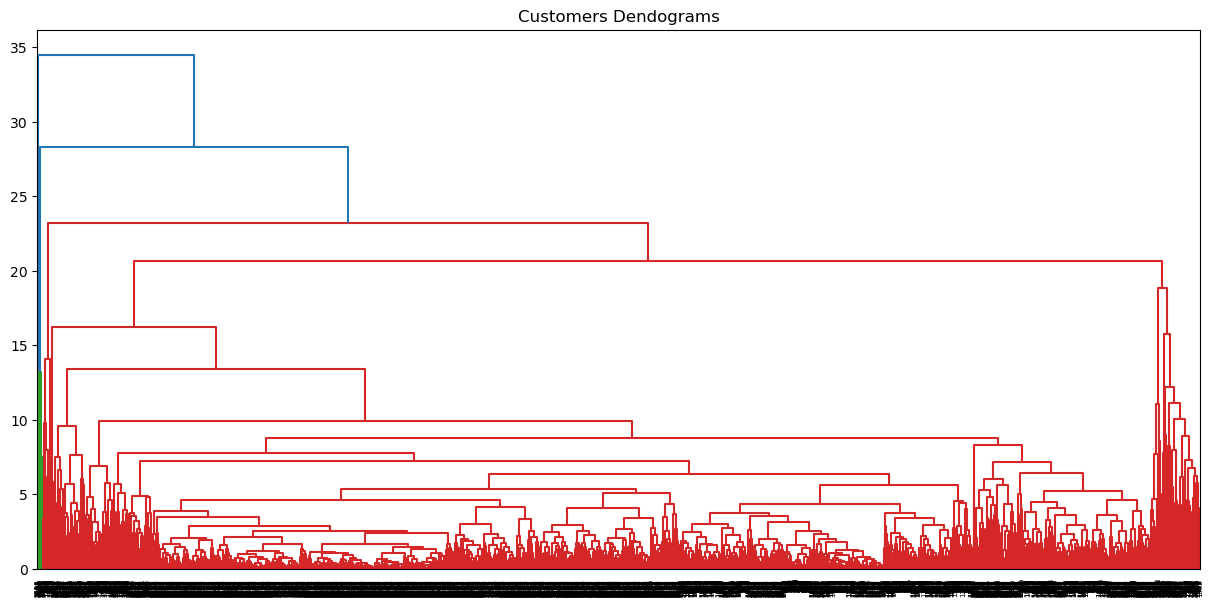

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.title("Customers Dendograms")
Dendrogram=shc.dendrogram(shc.linkage(df.iloc[:,1:12],method ="complete"))

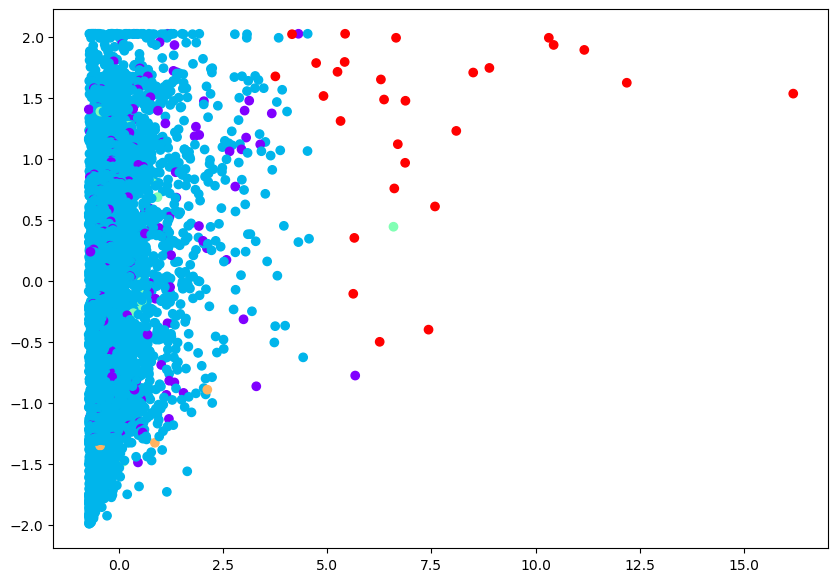

In [ ]:

plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,10], c=cluster.labels_ ,cmap='rainbow')

### DBSCAN :

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=6)
dbscan.fit(df.iloc[:,1:12])

DBSCAN(eps=3, min_samples=6)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
silhouette_score(df.iloc[:,1:12],labels=dbscan.labels_)

0.5423021447133288

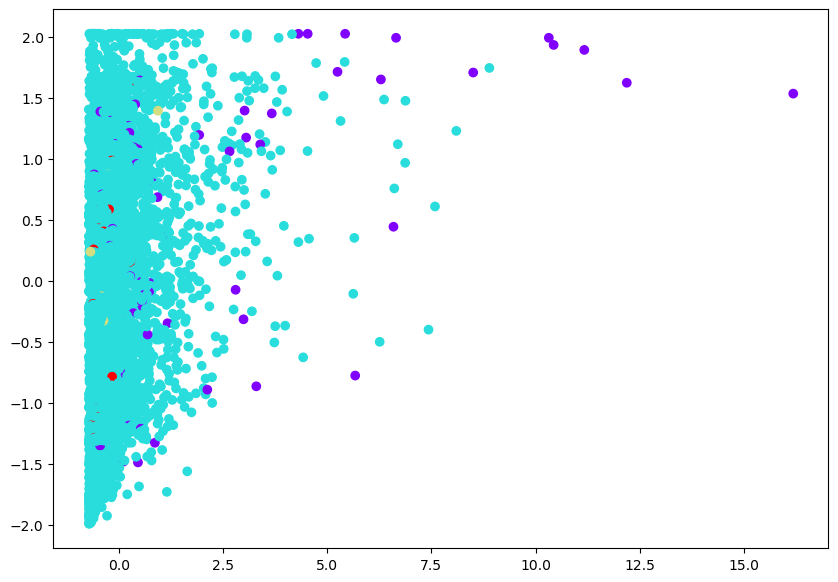

In [ ]:

plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,10], c=dbscan.labels_ ,cmap='rainbow')